>[Actividad 6](#scrollTo=6d336141)

>>>[Métodos computacionales para físicos  y astrónomos](#scrollTo=6d336141)

>>>[Universidad de Antioquia](#scrollTo=6d336141)

>>>[Prof: Hernan D. Salinas Jiménez](#scrollTo=6d336141)

>[trabajo de clase](#scrollTo=UIVOPvrlDCM3)

>[Activity__:  Movement with uniform acceleration](#scrollTo=494edb2b)

>[Activity__:](#scrollTo=49ccc036)

>[Activity__: Apply lagrange interpolations with the following points, work with pandas data frame](#scrollTo=qmNRcv1jVzNp)

>[Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.](#scrollTo=940edc99)

>>[proceso de la imagen en jupyter. No ejecutar](#scrollTo=ukUQ8JKMpVYR)



<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

#trabajo de clase

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

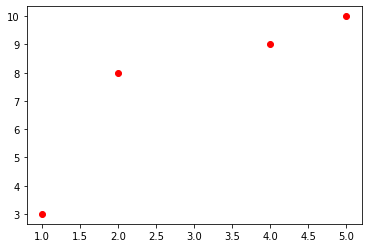

In [ ]:
x_= np.array([1,2,4, 5])
y_= np.array([3,8,9, 10])

plt.plot(x_,y_, 'ro')

In [ ]:
f=interp1d(x_, y_, kind='linear')    #funcion de interpolacion
g=interp1d(x_, y_, kind='cubic')

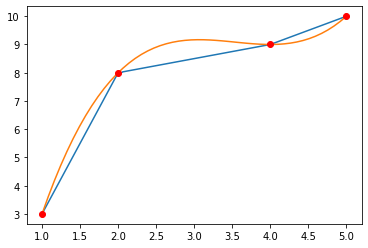

In [ ]:
x= np.linspace(1,5)
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.plot(x_,y_, 'ro')

In [ ]:
#veamos ahora las ecuaciones que nos conectan estos dos puntos --> manualmente


x_= np.array([1,2,4])
y_= np.array([3,8,9])
x= np.array([2,4, 5])
y= np.array([8,9, 10])

def recta(p):
  k = y_ +((y - y_) / (x - x_) * (p-x_))
  return k

#Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



In [ ]:
from scipy import interpolate
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
#comenzamos por definir el polinomio que nos piden, de una forma expandida, como nos dice el hint

def x(t, x_0, t_0, v_0, a):
  return x_0 - v_0 * t_0 + (1/2) * a * t_0**2 + (v_0 - a * t_0) * t + (1/2) * a * t**2

In [ ]:
#ahora, analizamos el problema que nos piden

#escribo la anterior ecuacion haciendo uso de poly1d de numpy

#escribo los valores iniciales del problema para el carro 1

v_0_1 = 0
t_0_1 = 0 
a_1 = 6
x_0_1 = 0 

ec_1 = np.poly1d([(1/2) * a_1 , (v_0_1 - a_1 * t_0_1), x_0_1 - v_0_1 * t_0_1 + (1/2) * a_1 * t_0_1**2], False, 't')          #pongo falso a razon de que no especifico las raices, y para que me la devuelva escrita en la variable t

print(f'la ecuacion que describe el movimiento para el primer carro es {ec_1}')


#veamos ahora las condiciones inciales para el segundo carro

v_0_2 = 10
t_0_2 = 10 
a_2 = 10
x_0_2 = 0 

ec_2 = np.poly1d([(1/2) * a_2 , (v_0_2 - a_2 * t_0_2), x_0_2 - v_0_2 * t_0_2 + (1/2) * a_2 * t_0_2**2], False, 't')

print(f'la ecuacion que describe el movimiento para el primer carro es {ec_2}')

la ecuacion que describe el movimiento para el primer carro es    2
3 t
la ecuacion que describe el movimiento para el primer carro es    2
5 t - 90 t + 400


In [ ]:
#observamos que en efeto las anteriores ecuaciones son las mismas que se pueden hacer haciendo el reemplazo a mano

In [ ]:
print(ec_2 - ec_1)

   2
2 x - 90 x + 400


In [ ]:
#escibimos entonces la ecuacion a la que le queremos encontrar los ceros, es decir, el valor de t, para el cual se cumple lo que nos piden

ecuacion = np.poly1d([2, -90, 400], False, 't')
print(ecuacion)

   2
2 t - 90 t + 400


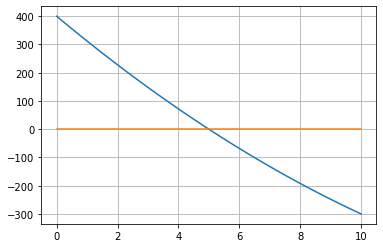

In [ ]:
#realizo un gráfica, para obtener un punto cercano al cero de la funcion

x= np.linspace(0, 10)
y= ecuacion(x)
ceros = np.zeros(50)

plt.figure()
plt.plot(x, y)
plt.plot(x, ceros)
plt.grid()

In [ ]:
#calculo el cero de la función a través del método de la bisección

t = optimize.bisect(ecuacion, 4, 6)
print(f'el valor de t para el cual los dos carros se encuentran es a los {t} segundos')

el valor de t para el cual los dos carros se encuentran es a los 5.0 segundos


In [ ]:
#veamos ahora la distancia desde el punto de partida a la cual se encuentran los dos carros

#basta con evaluar la ecuación de posicion para uno de los carros, teniendo en cuenta sus condiciones iniciales

#reemplacemos t en la ecuacion del carro 1

print(f' la distancia a la cual se encuentran los dos carros, son respecto a la posicion en la cual partieron es {ec_1(t)} metros')

 la distancia a la cual se encuentran los dos carros, son respecto a la posicion en la cual partieron es 75.0 metros


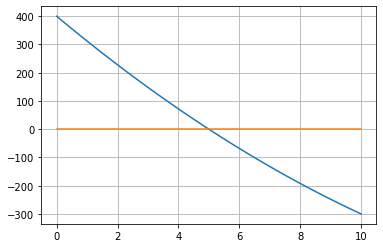

In [ ]:
x= np.linspace(0, 10)
y= ecuacion(x)
ceros = np.zeros(50)

plt.figure()
plt.plot(x, y)
plt.plot(x, ceros)
plt.grid()

#Activity__: 
For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.



In [ ]:
ec= lambda x: np.tan(x)

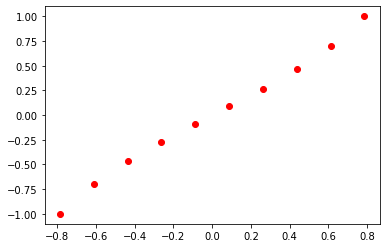

In [ ]:
x= np.linspace(-np.pi/4, np.pi/4, 10)
y= ec(x)

plt.plot(x, y, 'ro');

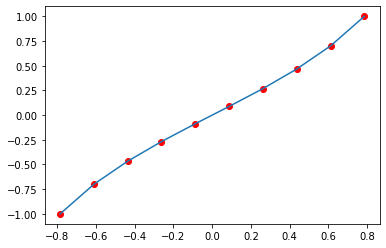

In [ ]:
#en primer lugar graficamos la funcion normal

x= np.linspace(-np.pi/4, np.pi/4, 10)
y= ec(x)

plt.plot(x, y, 'ro')
plt.plot(x, y);

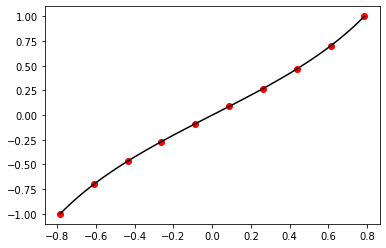

In [ ]:
#veamos ahora como queda el gráfico por medio de la interpolacion de lagrange y por medio de los splines cubicos

int_lagrange = interpolate.lagrange(x, y)
x= np.linspace(-np.pi/4, np.pi/4, 10)

x_= np.linspace(-np.pi/4, np.pi/4, 100)
y_ = int_lagrange(x_)

plt.plot(x, y, 'ro')
plt.plot(x_, y_, 'k')

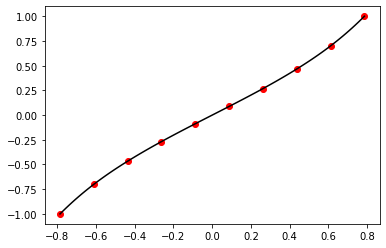

In [ ]:
int_cubica = interpolate.CubicSpline(x, y)
x= np.linspace(-np.pi/4, np.pi/4, 10)

x_= np.linspace(-np.pi/4, np.pi/4, 100)
y_ = int_cubica(x_)

plt.plot(x, y, 'ro')
plt.plot(x_, y_, 'k');

Aparentemente, no se observan cambios respecto a las tres gráficas que se han realizado, veamos ahora que ocurre si variamos el numero de puntos que consideramos

In [ ]:
#analizamos el comportamiento para 3 puntos

ec= lambda x: np.tan(x)

plt.figure(figsize=(15, 7))

#en primer lugar graficamos la funcion normal

x= np.linspace(-np.pi/4, np.pi/4, 3)
y= ec(x)
x_= np.linspace(-np.pi/4, np.pi/4, 100)
y_ = ec(x_)

plt.subplot(2, 2, 1)
plt.plot(x, y, 'ro')
plt.plot(x_, y_)
plt.title('funcion')
plt.xlabel('x')
plt.ylabel('f(x)')

#lagrange

int_lagrange = interpolate.lagrange(x, y)
x_= np.linspace(-np.pi/4, np.pi/4, 100)
y_ = int_lagrange(x_)

plt.subplot(2,2, 2)
plt.plot(x, y, 'ro')
plt.plot(x_, y_, 'k')
plt.title('Lagrange')
plt.xlabel('x')
plt.ylabel('interpolación')

#splines cúbicos
int_cubica = interpolate.CubicSpline(x, y)
x_= np.linspace(-np.pi/4, np.pi/4, 100)
y_ = int_cubica(x_)

plt.subplot(2,2,3)
plt.plot(x, y, 'ro')
plt.plot(x_, y_, 'k')
plt.title('Splines cúbicos')
plt.xlabel('x')
plt.ylabel('interpolación')

plt.tight_layout();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

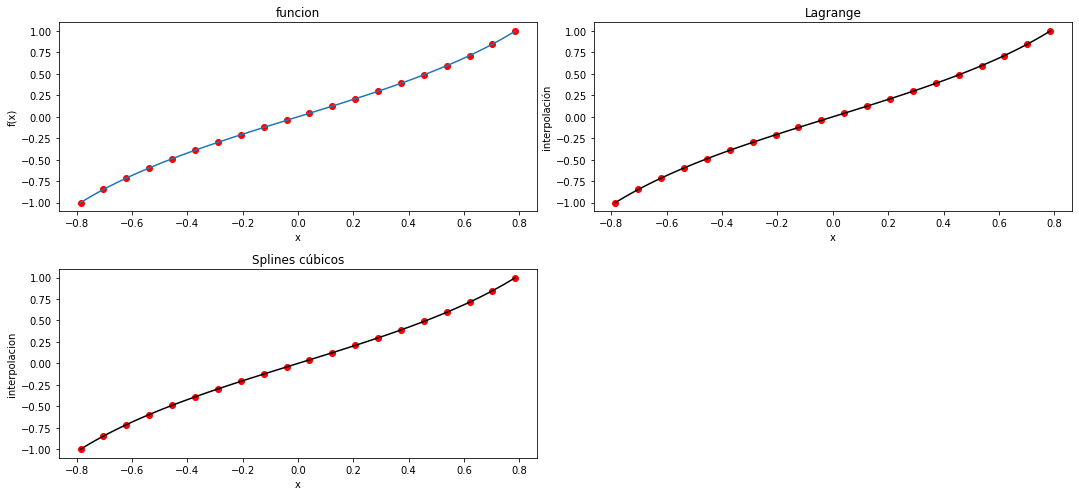

In [ ]:
#analizamos el comportamiento para 20 puntos

ec= lambda x: np.tan(x)

plt.figure(figsize=(15, 7))

#en primer lugar graficamos la funcion normal

x= np.linspace(-np.pi/4, np.pi/4, 20)
y= ec(x)
x_= np.linspace(-np.pi/4, np.pi/4, 100)
y_ = ec(x_)

plt.subplot(2, 2, 1)
plt.plot(x, y, 'ro')
plt.plot(x_, y_)
plt.title('funcion')
plt.xlabel('x')
plt.ylabel('f(x)')

#lagrange

int_lagrange = interpolate.lagrange(x, y)
x_= np.linspace(-np.pi/4, np.pi/4, 100)
y_ = int_lagrange(x_)

plt.subplot(2,2, 2)
plt.plot(x, y, 'ro')
plt.plot(x_, y_, 'k')
plt.title('Lagrange')
plt.xlabel('x')
plt.ylabel('interpolación')

#splines cúbicos
int_cubica = interpolate.CubicSpline(x, y)
x_= np.linspace(-np.pi/4, np.pi/4, 100)
y_ = int_cubica(x_)

plt.subplot(2,2,3)
plt.plot(x, y, 'ro')
plt.plot(x_, y_, 'k')
plt.title('Splines cúbicos')
plt.xlabel('x')
plt.ylabel('interpolacion')

plt.tight_layout();

Observamos que con el aumentos de puntos, las interpolaciones generan resultados más cercanos a los esperados.

Cuando consideramos solamente 3 puntos, la interpolacion se hace como la de una linea recta

#Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [ ]:
x = np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

df = pd.DataFrame()
df['x'] = x
df['f(x)'] = fx
df



#tambien puedo hacer esto como series--> la construccion del dataframe

,x,f(x)
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


In [ ]:
polinomio = interpolate.lagrange(df['x'], df['f(x)'])         #me retorna los coeficientes que me llevan a ese polinomio
polinomio

poly1d([ 0.0018251 ,  0.0552928 , -0.3430466 ,  0.07339135,  0.97773506])

In [ ]:
print(polinomio)    #traduce la productoria a este polinomio

          4           3         2
0.001825 x + 0.05529 x - 0.343 x + 0.07339 x + 0.9777


In [ ]:
type(polinomio)

numpy.poly1d

In [ ]:
polinomio.coef    #imprimo los coeficientes como un array

array([ 0.0018251 ,  0.0552928 , -0.3430466 ,  0.07339135,  0.97773506])

#Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 



3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [ ]:
#vamos a realizar la interpolacion del domo

#abrimos al imagen de drive con gimp online

In [ ]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
import numpy as np

url= 'https://www.turismodeestrellas.com/media/files/1973_planetario-medellin.jpg'

response = requests.get(url)

In [ ]:
response

<Response [200]>

In [ ]:
#response.content    --> convertir el formato de binario a un formato de imagen

In [ ]:
###estamos trabajandoe en el local, por lo cual debo montar la imagen cada que vaya a ejecutar el código

from io import BytesIO
img = Image.open(BytesIO(response.content))


In [ ]:
type(img)  #debemos convertir de png image file a un formato de matplotlib

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
planetario = np.array(img)

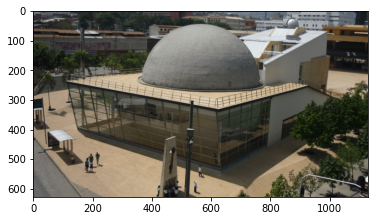

In [ ]:
plt.imshow(planetario)

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

(150.0, 0.0)

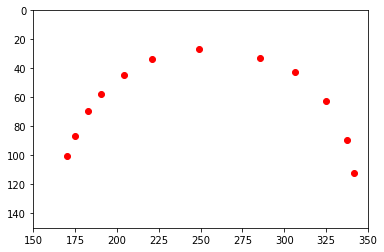

In [ ]:
x = np.array([169.9, 174.8, 182.6, 190.5, 204.2, 220.9, 249.3, 285.5, 306.1, 324.7, 337.5, 341.4])
y = np.array([100.4, 86.7, 69.1, 57.6, 44.6, 33.8, 26.9, 32.8, 42.6, 62.2, 89.6, 112.2])
plt.plot(x, y, 'ro')
plt.xlim(150,350)
plt.ylim(150,0)

In [ ]:
poly = interpolate.lagrange(x, y)
print(poly)

           11             10             9             8             7
2.639e-19 x  - 7.322e-16 x  + 9.187e-13 x - 6.881e-10 x + 3.418e-07 x
              6           5         4         3             2
 - 0.0001182 x + 0.02906 x - 5.074 x + 616.9 x - 4.972e+04 x + 2.391e+06 x - 5.196e+07


(150.0, 0.0)

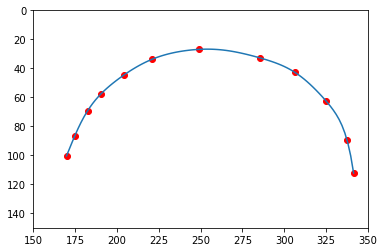

In [ ]:
#comenzamos por mirar como nos queda la interpolacion de lagrange
plt.plot(x, y, 'ro')
x_ = np.linspace(min(x), max(x), 100)
plt.plot(x_, poly(x_))
plt.xlim(150,350)
plt.ylim(150,0)

In [ ]:
#veamos ahora con el método de spline cúbico

In [ ]:
poly_spline = interpolate.CubicSpline(x, y)            #usamos nuevamente la lista de puntos que habíamos definido previamente

(150.0, 0.0)

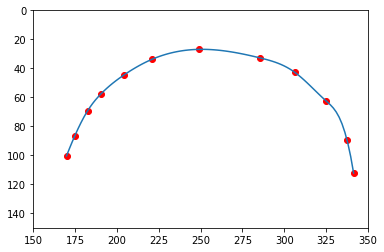

In [ ]:
plt.figure()
plt.plot(x, y, 'ro')
x_ = np.linspace(min(x), max(x), 100)
plt.plot(x_, poly_spline(x_))
plt.xlim(150,350)
plt.ylim(150,0)

Notamos que en la interpolación de lagrange se presentan menos oscilaciones con respecto a las que se obtienen empleando el método de los spline cúbicos.

La principal razon de estas variaciones es los puntos que se consideran. Por ejemplo, para el caso de la interpolacion de lagrange tenemos un polinomio de grado 11, donde las oscilaciones ocurren principalmente cuando los puntos se encuentran más distanciados (corespondientes a la unión de los últimos 5 puntos).

A medida que se consideren puntos más alejados, la interpolación va ser menos precisa con respecto al resulado esperado, debido a que el método o tiene informacion acerca de lo que pasa en la funcion que necesitamos en las partes intermedias de los puntos

##proceso de la imagen en jupyter. No ejecutar
La idea de no ejecutar estas celdas es a razón de que la forma de importar las imagenes en Jupyter lab es diferente a hacerlo en colab, por lo cual se dejan los recultados tal como se obtuvieron en clase.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [ ]:
%matplotlib notebook  

<IPython.core.display.Javascript object>


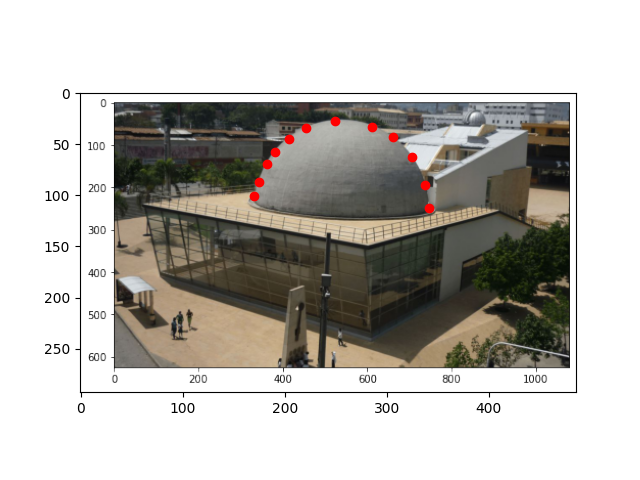

In [ ]:
im = plt.imread('planetario.png')
x = np.array([169.9, 174.8, 182.6, 190.5, 204.2, 220.9, 249.3, 285.5, 306.1, 324.7, 337.5, 341.4])
y = np.array([100.4, 86.7, 69.1, 57.6, 44.6, 33.8, 26.9, 32.8, 42.6, 62.2, 89.6, 112.2])
plt.plot(x, y, 'ro')
plt.imshow(im)

In [51]:
poly = interpolate.lagrange(x, y)
poly

poly1d([1.27323954, 0.        ])

In [52]:
print(poly)

 
1.273 x


<IPython.core.display.Javascript object>


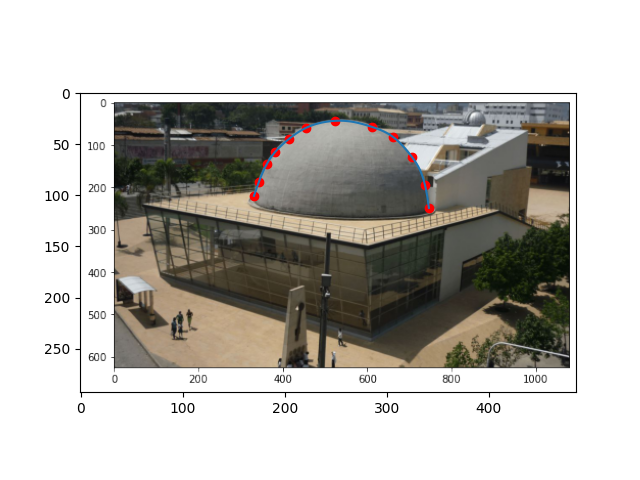

In [ ]:
plt.figure()
im = plt.imread('planetario.png')
x_= np.linspace(min(x), max(x), 100)
plt.plot(x, y, 'ro')
plt.imshow(im)
plt.plot(x_, poly(x_))

In [ ]:
poly_spline = interpolate.CubicSpline(x, y)

<IPython.core.display.Javascript object>


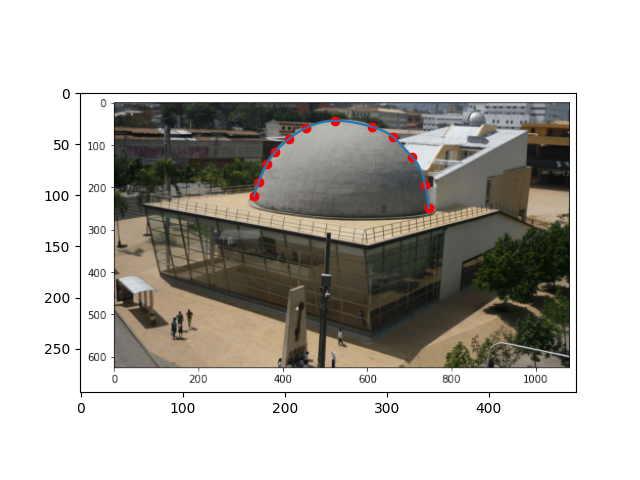

In [ ]:
plt.figure()
im = plt.imread('planetario.png')
plt.plot(x, y, 'ro')
plt.imshow(im)
plt.plot(x_, poly_spline(x_))